# Hacker Earth Machine Learning Challenge 1
#### <font color = blue> Problem Statement </font>

The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.

After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.

This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.

In this challenge, you will help this bank by predicting the probability that a member will default.



In [39]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [3]:
dfTrain = pd.read_csv('train_indessa.csv')
dfTest = pd.read_csv('test_indessa.csv')
# All Available Columns: 'member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'sub_grade', 'term', 'batch_enrolled', 'desc', 'grade', 'emp_length', 'int_rate', 'pymnt_plan', 'initial_list_status', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'verification_status_joint', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status
dfTrain = dfTrain[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]
dfTest = dfTest[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

### Data Preparation

In [4]:

dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')
dfTest['term'] = pd.to_numeric(dfTest['term'], errors='coerce')


dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTest['emp_length'].replace('n/a', '0', inplace=True)
dfTest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')
dfTest['emp_length'] = pd.to_numeric(dfTest['emp_length'], errors='coerce')


dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')
dfTest['last_week_pay'] = pd.to_numeric(dfTest['last_week_pay'], errors='coerce')


dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
dfTest['sub_grade'] = pd.to_numeric(dfTest['sub_grade'], errors='coerce')


In [5]:
#Missing values imputation

cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)
    dfTest[col].fillna(dfTest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    dfTrain[col].fillna(0, inplace=True)
    dfTest[col].fillna(0, inplace=True)


In [6]:


# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(dfTest['member_id'])


# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(dfTrain['loan_status'])


# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dfTrain[selected_cols]
finalTest = dfTest[selected_cols]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
finalTest['loan_to_income'] = finalTest['annual_inc']/finalTest['funded_amnt_inv']


# All these attributes indicate that the repayment was not all hunky-dory. All the amounts caclulated are ratios 
# like, recovery to the loan amount. This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])
finalTest['bad_state'] = finalTest['acc_now_delinq'] + (finalTest['total_rec_late_fee']/finalTest['funded_amnt_inv']) + (finalTest['recoveries']/finalTest['funded_amnt_inv']) + (finalTest['collection_recovery_fee']/finalTest['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTest['funded_amnt_inv'])

# For the sake of this model, I have used just a boolean flag if things had gone bad, with this case I didn't see
# a benifit of including above computations
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1
finalTest.loc[finalTest['bad_state'] > 0, 'bad_state'] = 1


# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']


# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']


# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100)


# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)
finalTest['total_repayment_progress'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100) + ((finalTest['recoveries']/finalTest['funded_amnt_inv']) * 100)

In [19]:
finalTrain.head()

,member_id,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,int_rate,annual_inc,dti,mths_since_last_delinq,...,collection_recovery_fee,term,acc_now_delinq,collections_12_mths_ex_med,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress
0,58189336,9.0,14350,14350,14350.0,43,19.19,28700.0,33.88,50.0,...,0.0,36,0.0,0.0,2.000000,0.0,14.0,1173.84,16.560510,16.560510
1,70011223,0.0,4800,4800,4800.0,14,10.99,65000.0,3.64,31.0,...,0.0,36,0.0,0.0,13.541667,0.0,7.0,83.95,5.732484,5.732484
2,70255675,2.0,10000,10000,10000.0,4,7.26,45000.0,18.42,31.0,...,0.0,36,0.0,0.0,4.500000,0.0,14.0,56.47,5.732484,5.732484
3,1893936,10.0,15000,15000,15000.0,35,19.72,105000.0,14.97,46.0,...,0.0,36,0.0,0.0,7.000000,0.0,11.0,4858.62,85.987261,85.987261
4,7652106,10.0,16000,16000,16000.0,12,10.64,52000.0,20.16,31.0,...,0.0,36,0.0,0.0,3.250000,0.0,16.0,2296.41,61.146497,61.146497


In [21]:
train_target.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [10]:
df_train.dropna(inplace=True)

In [22]:
X = finalTrain.copy()
y = train_target.copy()

In [24]:
X.isna().sum()

member_id                        0
emp_length                       0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
sub_grade                        0
int_rate                         0
annual_inc                       0
dti                              0
mths_since_last_delinq           0
mths_since_last_record           0
open_acc                         0
revol_bal                        0
revol_util                       0
total_acc                        0
total_rec_int                    0
total_rec_late_fee               0
mths_since_last_major_derog      0
last_week_pay                    0
tot_cur_bal                      0
total_rev_hi_lim                 0
tot_coll_amt                     0
recoveries                       0
collection_recovery_fee          0
term                             0
acc_now_delinq                   0
collections_12_mths_ex_med       0
loan_to_income                   0
bad_state           

In [25]:
# Find and drop rows with null values in X_train
X = X.dropna()

# Drop corresponding rows from y_train based on the index of the dropped rows in X_train
y = y.loc[X.index]

# Reset the index of both data frames
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[77542,  3846],
       [14584, 10486]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

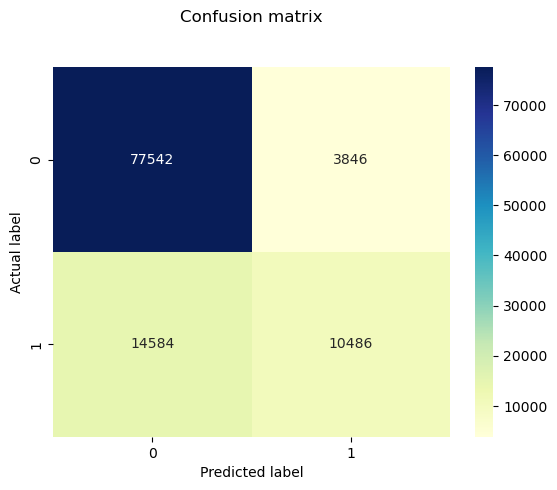

In [35]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8268800841646471

In [40]:
target_names = ['will NOT default', 'will default']
print(classification_report(y_test, y_pred,target_names=target_names))

                  precision    recall  f1-score   support

will NOT default       0.84      0.95      0.89     81388
    will default       0.73      0.42      0.53     25070

        accuracy                           0.83    106458
       macro avg       0.79      0.69      0.71    106458
    weighted avg       0.82      0.83      0.81    106458



#### ACCURACY SCORE for the model is: 0.83